## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [4]:
# Your code here
DF_raw = pd.read_csv('mapdataall.csv')
print(DF_raw)

             incident_name incident_is_final  incident_date_last_update  \
0              Bridge Fire                 Y       2018-01-09T13:46:00Z   
1                Pala Fire                 Y       2020-09-16T14:07:35Z   
2               River Fire                 Y       2022-10-24T11:39:23Z   
3            Fawnskin Fire                 Y       2013-04-22T09:00:00Z   
4                Gold Fire                 Y       2013-05-01T07:00:00Z   
...                    ...               ...                        ...   
2729             Peak Fire                 N       2024-10-03T15:09:15Z   
2730             Bear Fire                 N       2024-10-03T09:10:01Z   
2731             Dino Fire                 N       2024-10-03T08:41:10Z   
2732  Pumpkin Prairie Fire                 N       2024-10-03T14:19:29Z   
2733          Felicia Fire                 N  2024-10-03T15:05:53-07:00   

     incident_date_created          incident_administrative_unit  \
0     2017-10-31T11:22:00Z     

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

Q1: Observations: 2734, Variables: 24
Q2: Incident types: 3


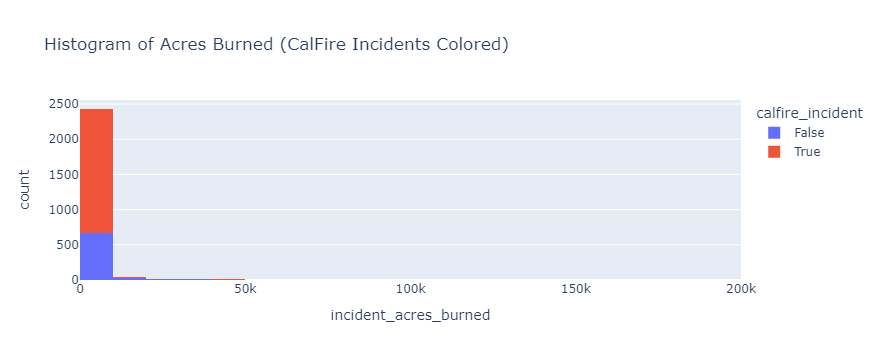

Q3: Burned more than 100,000 acres: 20
Q3: Largest Fire: 1032648.0 acres.


In [21]:
# You will need to write some code to answer the questions.
# Q1
num_observations, num_variables = DF_raw.shape
print(f"Q1: Observations: {num_observations}, Variables: {num_variables}")

# Q2
num_incident_types = DF_raw['incident_type'].nunique()
print(f"Q2: Incident types: {num_incident_types}")

# Q3
mask = (DF_raw['incident_acres_burned'] > 10) & (DF_raw['incident_acres_burned'] < 200000)
filtered_data = DF_raw[mask]

fig = px.histogram(filtered_data, 
                   x='incident_acres_burned', 
                   color='calfire_incident', 
                   title='Histogram of Acres Burned (CalFire Incidents Colored)', 
                   nbins=30)
fig.show()

num_large_fires = DF_raw[DF_raw['incident_acres_burned'] > 100000].shape[0]
print(f"Q3: Burned more than 100,000 acres: {num_large_fires}")

largest_fire = DF_raw['incident_acres_burned'].max()
print(f"Q3: Largest Fire: {largest_fire} acres.")



**(Click Here)**



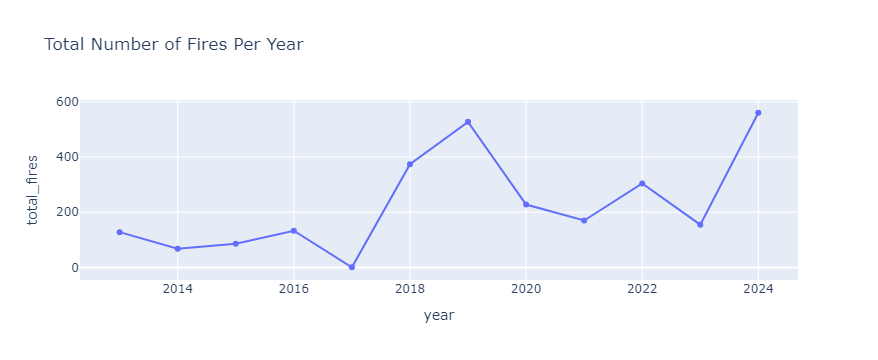

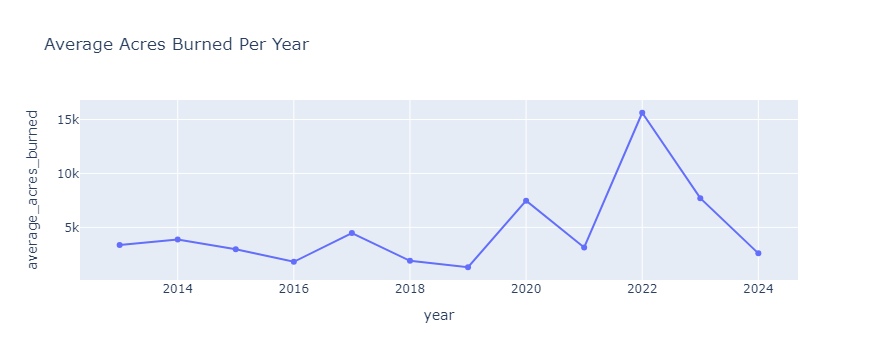

In [20]:
# Extra Code
DF_raw['incident_date_last_update'] = pd.to_datetime(DF_raw['incident_date_last_update'], utc=True, errors='coerce')

DF_raw['year'] = DF_raw['incident_date_last_update'].dt.year

annual_data = DF_raw.groupby('year').agg(
    total_fires=('incident_name', 'count'),
    average_acres_burned=('incident_acres_burned', 'mean')
).reset_index()

fig1 = px.line(annual_data, x='year', y='total_fires', title='Total Number of Fires Per Year', markers=True)
fig1.show()

fig2 = px.line(annual_data, x='year', y='average_acres_burned', title='Average Acres Burned Per Year', markers=True)
fig2.show()


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [29]:
# Your code here
DF_raw = DF[0]
show(DF_raw)
DF_raw.describe()

,Film,Year,Awards,Nominations
count,1373,1373,1373,1373
unique,1359,96,22,24
top,Little Women,1945,1,1
freq,3,21,979,550


In [22]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [36]:
# Your code here
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]

DF_raw['Awards'] = DF_raw['Awards'].astype(str).str.extract(r'(\d+)')[0].astype(int)
DF_raw['Awards'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})


,Awards,count
0,1,987
1,2,157
2,3,78
3,4,48
4,0,36
5,5,26
6,7,13
7,6,13
8,8,8
9,11,3


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [37]:
# Your code here
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]

DF_raw['Nominations'] = DF_raw['Nominations'].astype(str).str.extract(r'(\d+)')[0].astype(int)
DF_raw['Nominations'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})


,Nominations,count
0,1,553
1,2,141
2,4,115
3,5,104
4,3,104
5,6,80
6,7,75
7,8,61
8,10,40
9,9,31


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [2]:

file_path = 'C:\\Users\\ambsc\\Downloads\\Electric_Vehicle_Population_Data.csv'  # Update with your file path
df = pd.read_csv(file_path)

print(df.head())


   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0        2018     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0        2020      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0        2014     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0        2017  CHEVROLET   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel

In [4]:
num_variables = df.shape[1]
num_observations = df.shape[0]
print(f'Variables: {num_variables}')
print(f'Observations: {num_observations}')

print('\nData Types:')
print(df.dtypes)


Variables: 17
Observations: 205439

Data Types:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                     

In [5]:
summary_stats = df.describe(include='all')  # Include all types of columns
print(summary_stats)

        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       205439  205436   205436  205439  205436.000000  205439.000000   
unique       12140     205      770      45            NaN            NaN   
top     7SAYGDEE6P    King  Seattle      WA            NaN            NaN   
freq          1221  105237    33328  204997            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98177.971870    2020.960363   
std            NaN     NaN      NaN     NaN    2419.037479       2.989059   
min            NaN     NaN      NaN     NaN    1731.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2019.000000   
50%            NaN     NaN      NaN     NaN   98125.000000    2022.000000   
75%            NaN     NaN      NaN     NaN   98372.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2025.000000   

          Make    Model           Electric Vehicle Type  \
count   205439  

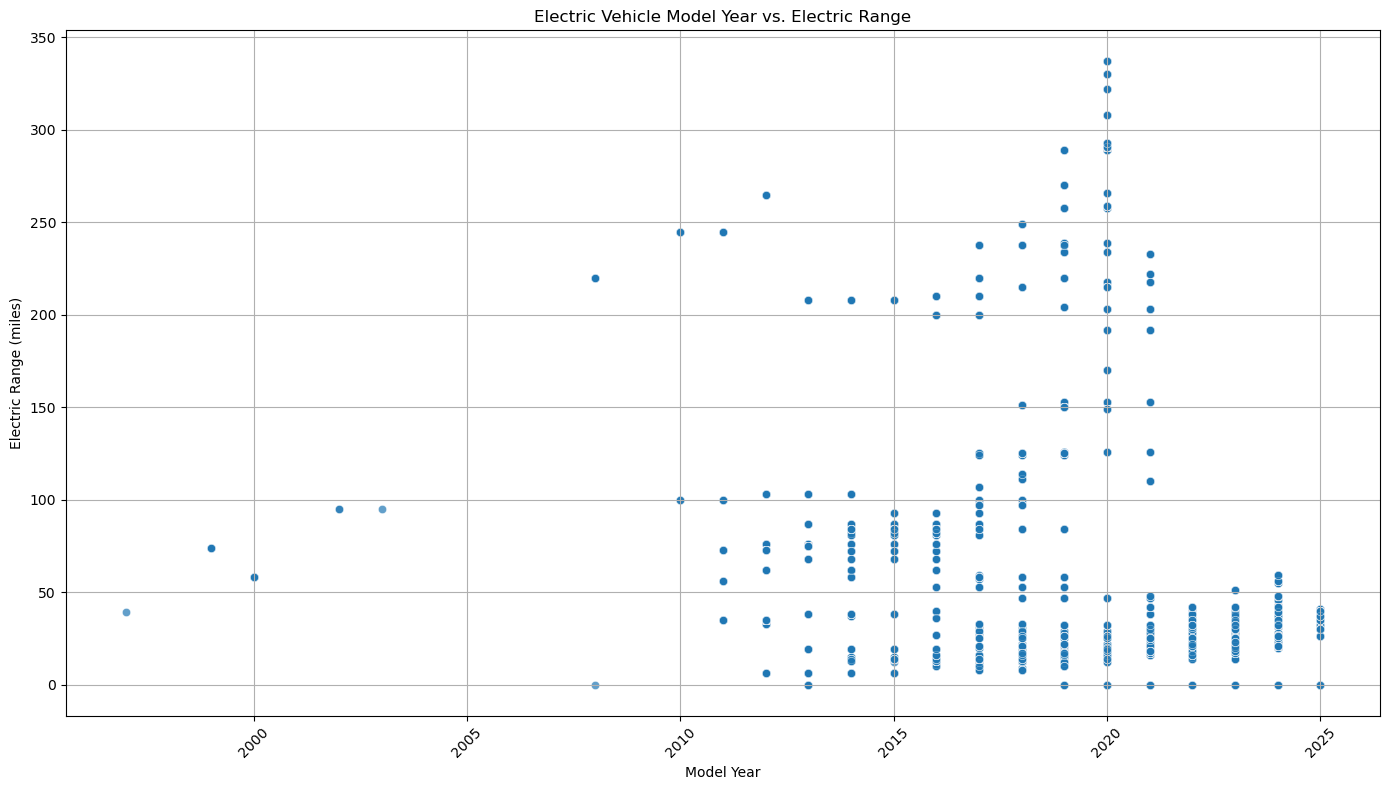

In [13]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', alpha=0.7)
plt.title('Electric Vehicle Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
